In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
wine_data = pd.read_csv('wine.csv')

In [84]:
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [85]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [86]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [89]:
 #Checking the percentage of missing values
round(100*(wine_data.isnull().sum()/len(wine_data.index)), 2)


Type               0.0
Alcohol            0.0
Malic              0.0
Ash                0.0
Alcalinity         0.0
Magnesium          0.0
Phenols            0.0
Flavanoids         0.0
Nonflavanoids      0.0
Proanthocyanins    0.0
Color              0.0
Hue                0.0
Dilution           0.0
Proline            0.0
dtype: float64

In [90]:
wine_data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

# checking for outliers

In [98]:
# checking for outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(wine_data[['Alcohol', 'Malic', 'Ash', 'Alcalinity', 
        'Phenols', 'Flavanoids', 'Proanthocyanins']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))


[[1.51861254 0.5622498  0.23205254 ... 0.80899739 1.03481896 1.22488398]
 [0.24628963 0.49941338 0.82799632 ... 0.56864766 0.73362894 0.54472099]
 [0.19687903 0.02123125 1.10933436 ... 0.80899739 1.21553297 2.13596773]
 ...
 [0.33275817 1.74474449 0.38935541 ... 1.12982378 1.34458217 0.4220751 ]
 [0.20923168 0.22769377 0.01273209 ... 1.03368389 1.35462184 0.22934584]
 [1.39508604 1.58316512 1.36520822 ... 0.39275127 1.2743045  0.4220751 ]]


*******************************************************************************


Below are the outlier points along with the respective column numbers in the second array


(array([ 25,  59,  73, 110, 121, 121, 123], dtype=int64), array([2, 2, 3, 6, 2, 5, 1], dtype=int64))


In [100]:
# Removing the outliers

wine_data_outliers_removed = wine_data[(z<3).all(axis=1)]

In [101]:
wine_data_outliers_removed.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [103]:
print('Shape of dataframe before outlier removal: ' + str(wine_data.shape))
print("\n")
print('Shape of dataframe after outlier removal: ' + str(wine_data_outliers_removed.shape))


Shape of dataframe before outlier removal: (178, 14)


Shape of dataframe after outlier removal: (172, 14)


In [106]:
X = wine_data_outliers_removed.drop('Alcohol',axis =1)  
y = wine_data_outliers_removed['Alcohol']


In [107]:
X.shape    

(172, 13)

In [108]:
y.shape

(172,)

# PCA

In [109]:
X.head()

,Type,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [110]:
y.head()

0    14.23
1    13.20
2    13.16
3    14.37
4    13.24
Name: Alcohol, dtype: float64

In [111]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

In [113]:
X_scaled = scaler.fit_transform(X)

In [114]:
X_scaled[:5,:5]

array([[-1.2030735 , -0.5627382 ,  0.26165456, -1.21717641,  1.98894128],
       [-1.2030735 , -0.4985167 , -0.91626325, -2.63043063,  0.04561216],
       [-1.2030735 ,  0.03360427,  1.23648308, -0.25359398,  0.11758731],
       [-1.2030735 , -0.34255021,  0.54597954, -0.83174344,  0.98128915],
       [-1.2030735 ,  0.24461776,  2.04884019,  0.51727196,  1.34116491]])

In [115]:
X.columns

Index(['Type', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [116]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [117]:
X_scaled_df.head()


,Type,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.203073,-0.562738,0.261655,-1.217176,1.988941,0.841914,1.083665,-0.666431,1.293259,0.226016,0.365049,1.870533,0.992753
1,-1.203073,-0.498517,-0.916263,-2.630431,0.045612,0.600458,0.775683,-0.826971,-0.541340,-0.317505,0.408792,1.135082,0.945299
2,-1.203073,0.033604,1.236483,-0.253594,0.117587,0.841914,1.268454,-0.505890,2.237806,0.243270,0.321306,0.809786,1.372381
3,-1.203073,-0.342550,0.545980,-0.831743,0.981289,2.532106,1.525105,-0.987512,1.093452,1.157766,-0.422322,1.205798,2.305633
4,-1.203073,0.244618,2.048840,0.517272,1.341165,0.841914,0.703821,0.216543,0.439535,-0.343387,0.365049,0.470347,-0.051224


<AxesSubplot:>

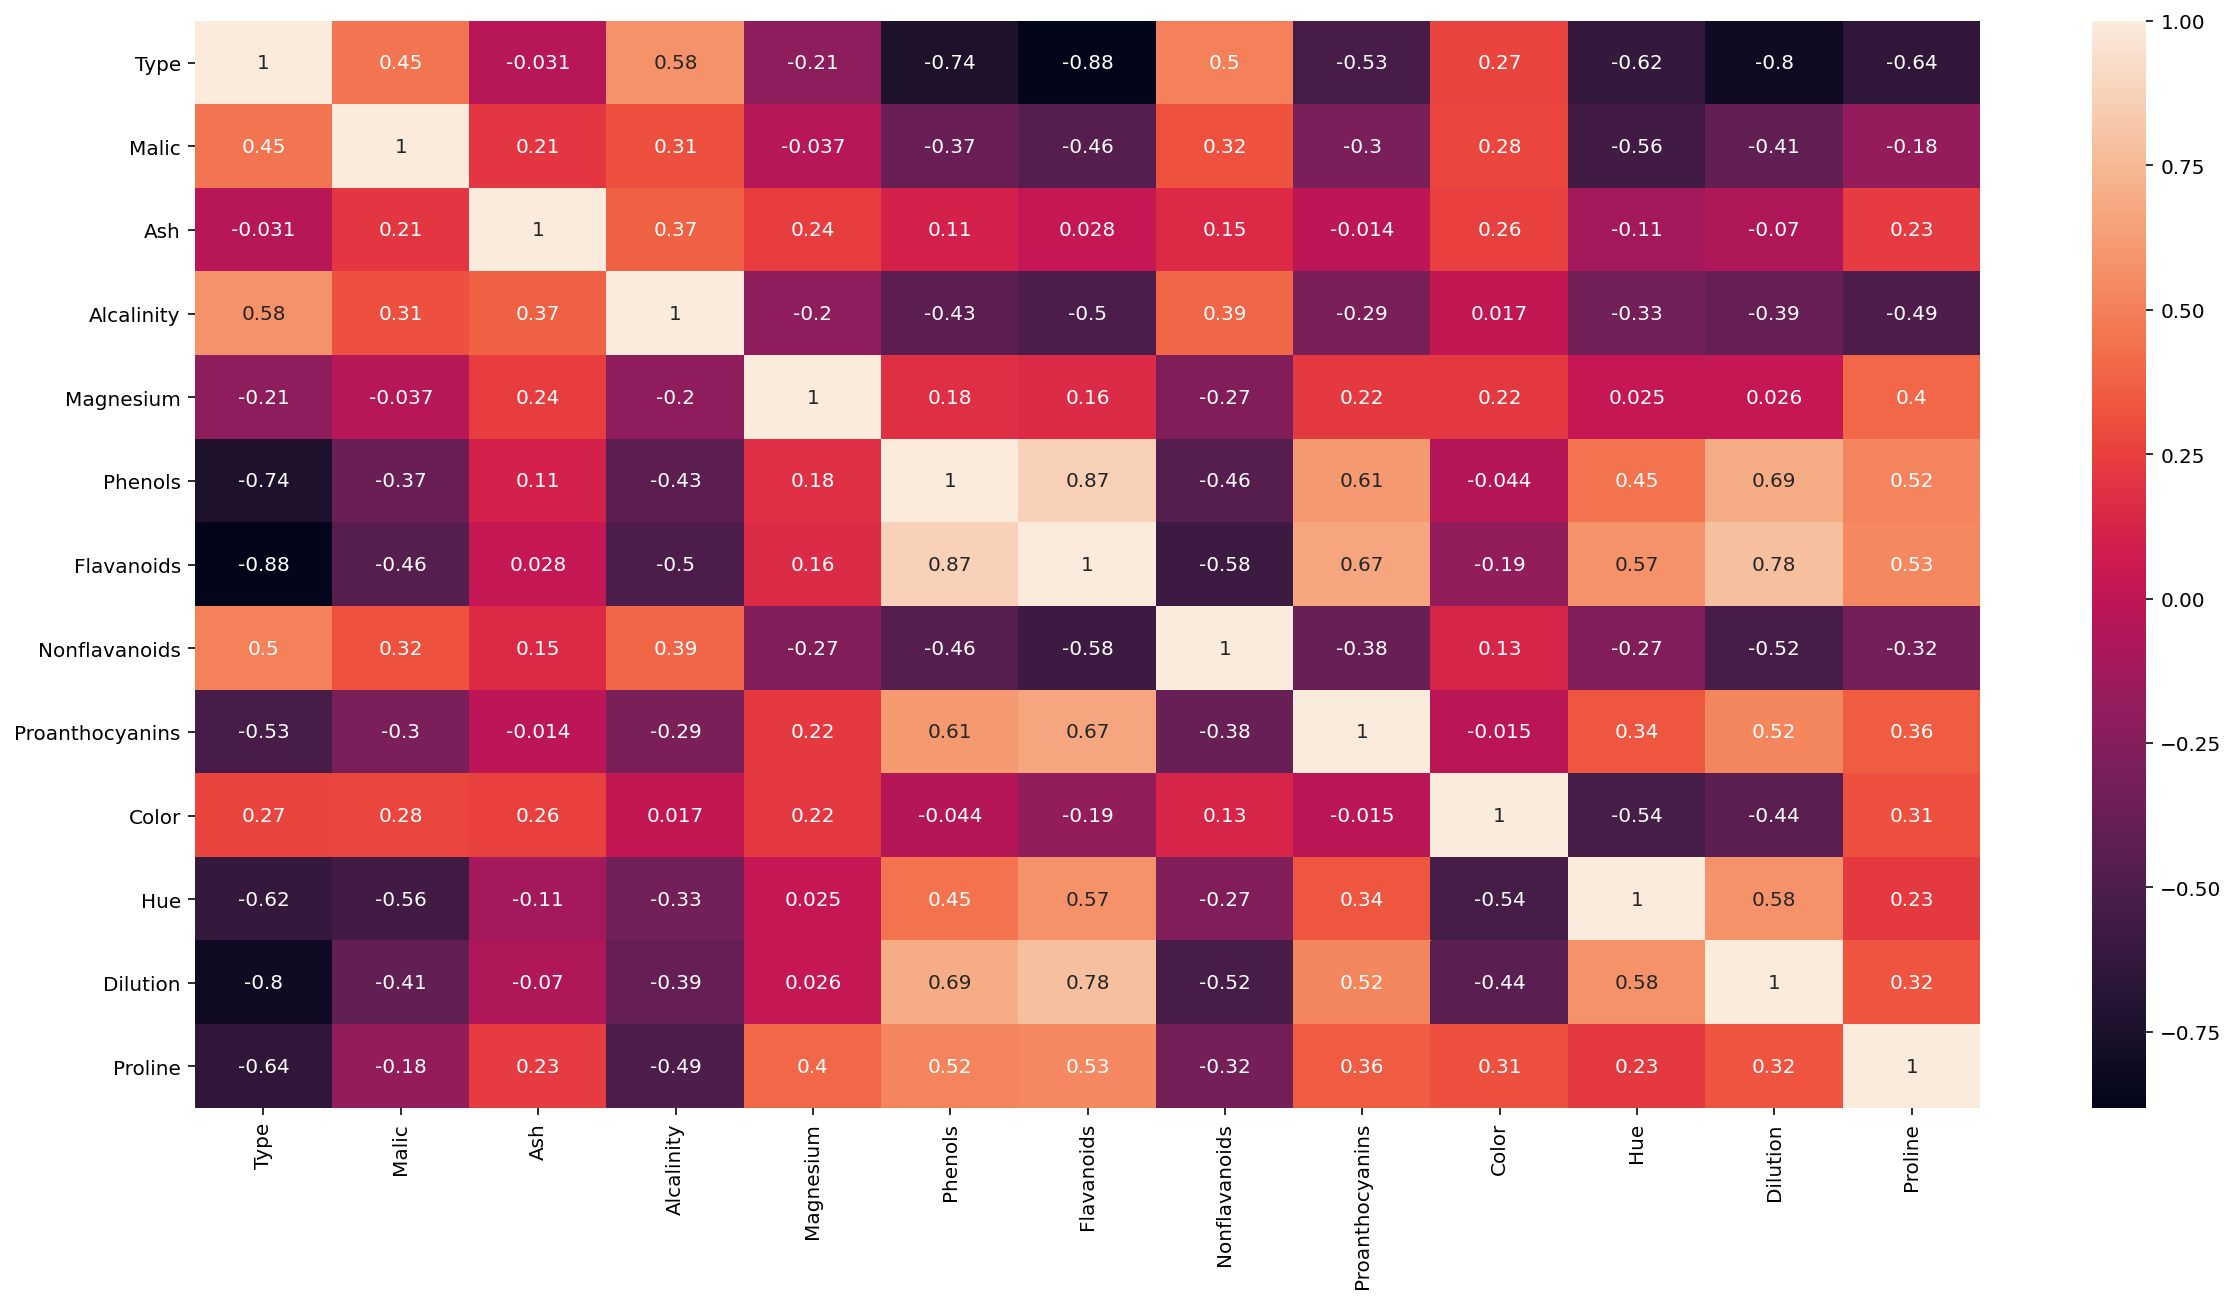

In [118]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [119]:
# we can see that some columns have significant correlation among themselves 

In [120]:
from sklearn.decomposition import PCA

In [121]:
pca = PCA(random_state=42)

In [122]:
pca.fit(X_scaled)

PCA(random_state=42)

In [123]:
pca.components_[0]

array([ 0.38862957,  0.2404644 ,  0.02814962,  0.26103934, -0.10447525,
       -0.35155765, -0.39377002,  0.26837569, -0.28271137,  0.10990146,
       -0.28524555, -0.35200648, -0.25168265])

In [124]:
pca.explained_variance_ratio_

array([0.43749562, 0.15842119, 0.09277171, 0.06493255, 0.06032041,
       0.05220744, 0.04268995, 0.02503649, 0.02117596, 0.01827754,
       0.01346826, 0.00974465, 0.00345822])

In [125]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.43749562, 0.5959168 , 0.68868851, 0.75362106, 0.81394147,
       0.86614892, 0.90883887, 0.93387536, 0.95505132, 0.97332886,
       0.98679713, 0.99654178, 1.        ])

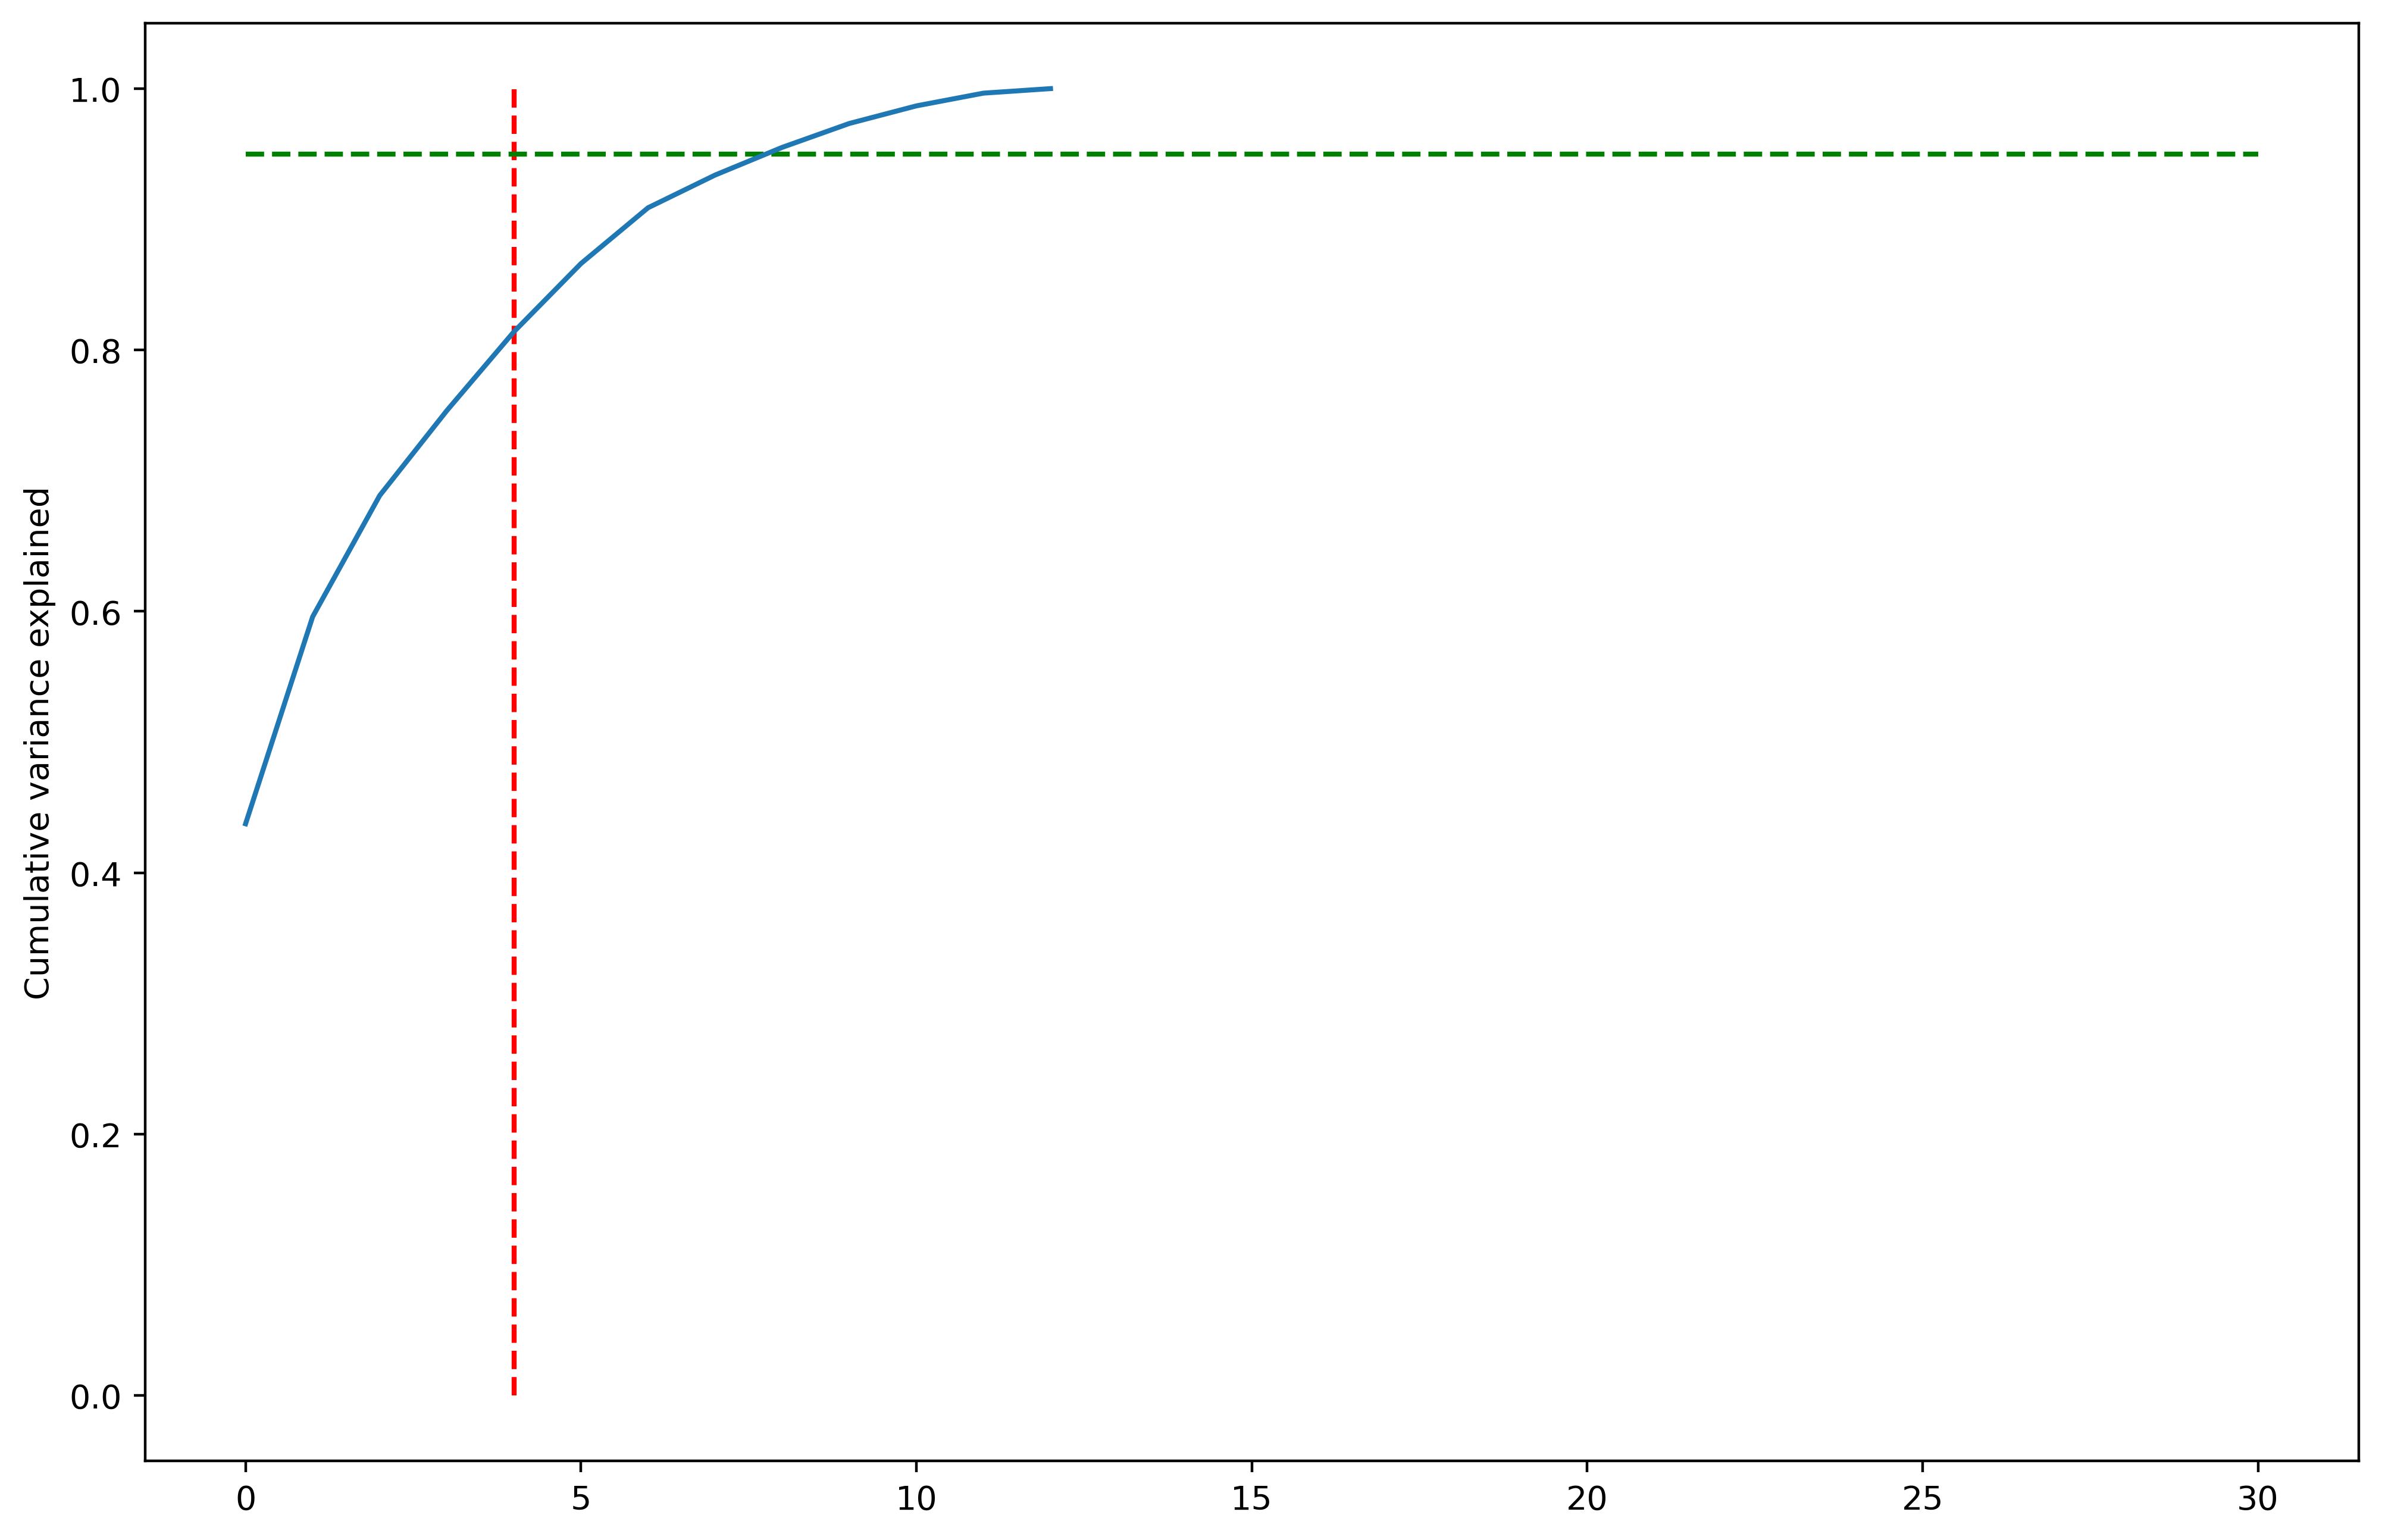

In [126]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()


# Performing PCA with  components

In [128]:
from sklearn.decomposition import IncrementalPCA

In [129]:
pca_final = IncrementalPCA(n_components=4)

In [130]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [131]:
print(X.shape)
print(X_pca_final.shape)

(172, 13)
(172, 4)


In [132]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [133]:
corrmat.shape

(4, 4)

<AxesSubplot:>

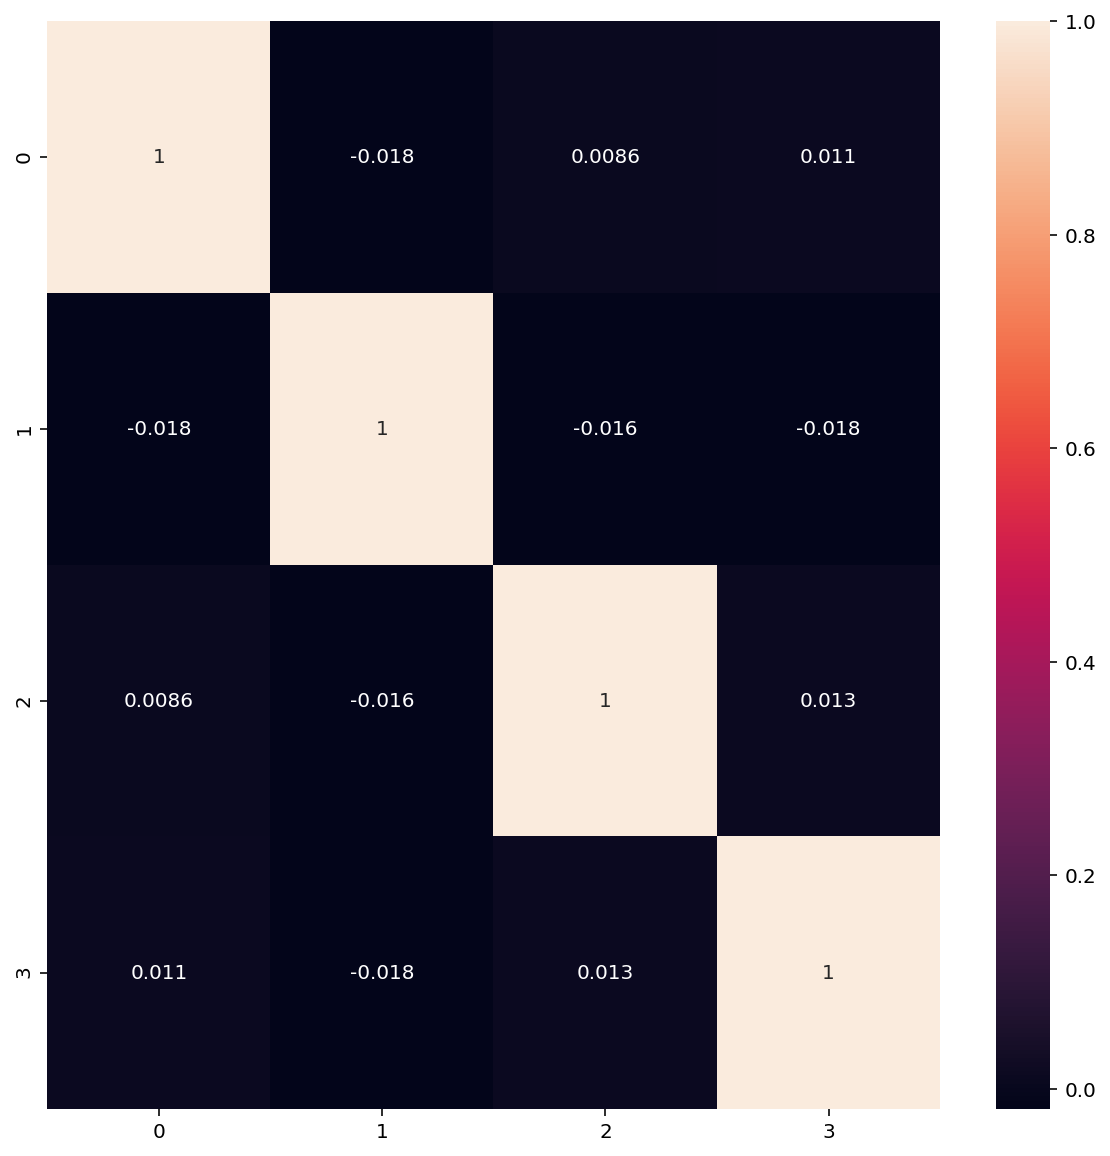

In [134]:
# Plotting the heatmap of the corr matrix
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)


# clustering k-means

In [135]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [136]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)


KMeans(max_iter=1000, n_clusters=5)

In [137]:
kmeans.labels_

array([0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 4, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 4, 2, 4, 3, 3,
       3, 3, 3, 4, 2, 4, 3, 3, 3, 3, 4, 3, 3, 2, 2, 4, 3, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 0, 4, 3, 4, 4, 3, 3, 4, 3, 3, 2, 3, 2, 3, 4, 3, 2, 2,
       2, 2, 3, 2, 3, 3, 4, 2, 4, 2, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Finding the Optimal Number of Clusters

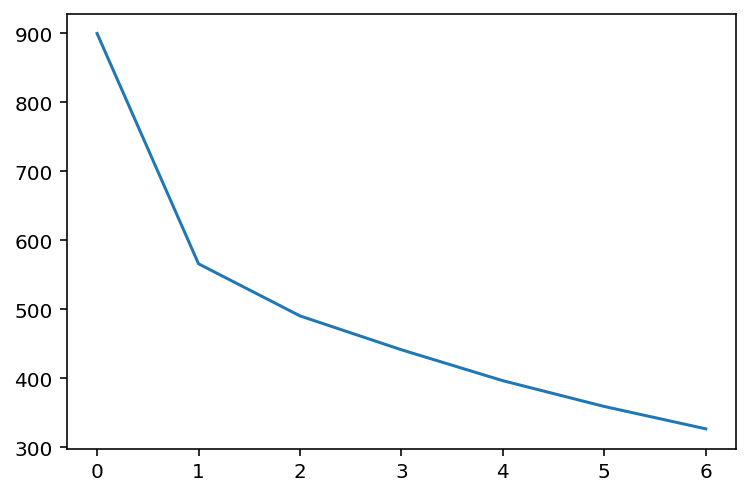

In [139]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [140]:
# from the elbow method we can say that k = 4 clusters seems to be a good choice

# Hierarchical Clustering

In [141]:
X_scaled_df.head()


,Type,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.203073,-0.562738,0.261655,-1.217176,1.988941,0.841914,1.083665,-0.666431,1.293259,0.226016,0.365049,1.870533,0.992753
1,-1.203073,-0.498517,-0.916263,-2.630431,0.045612,0.600458,0.775683,-0.826971,-0.541340,-0.317505,0.408792,1.135082,0.945299
2,-1.203073,0.033604,1.236483,-0.253594,0.117587,0.841914,1.268454,-0.505890,2.237806,0.243270,0.321306,0.809786,1.372381
3,-1.203073,-0.342550,0.545980,-0.831743,0.981289,2.532106,1.525105,-0.987512,1.093452,1.157766,-0.422322,1.205798,2.305633
4,-1.203073,0.244618,2.048840,0.517272,1.341165,0.841914,0.703821,0.216543,0.439535,-0.343387,0.365049,0.470347,-0.051224


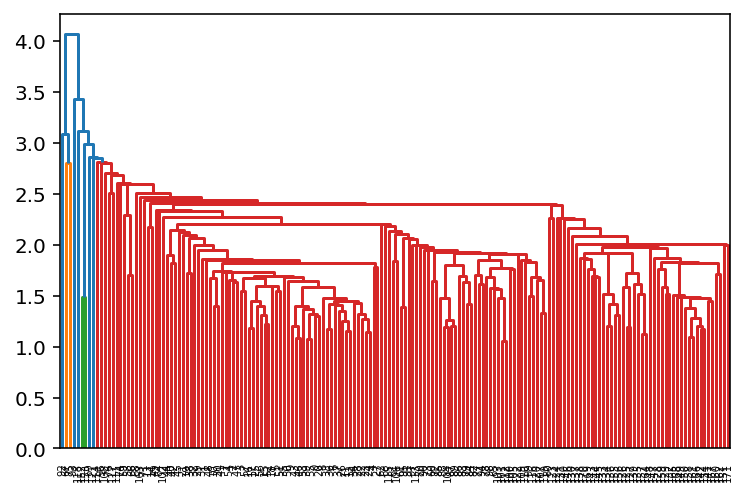

In [142]:
# single linkage
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

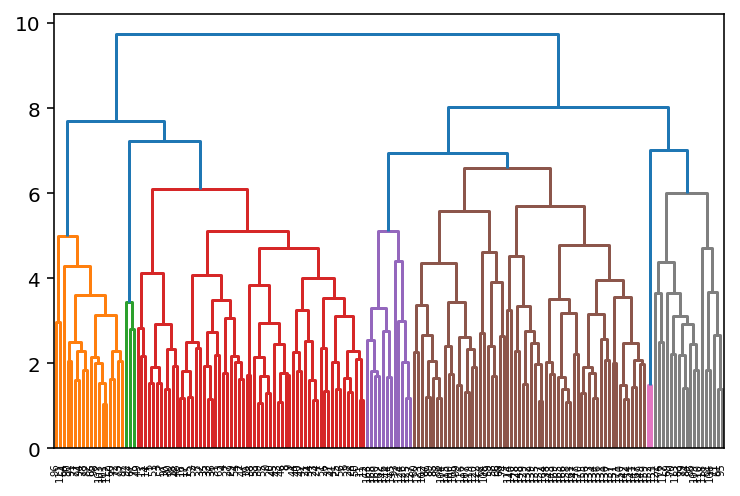

In [143]:
# complete linkage
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()


In [144]:
# 4 clusters using single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [145]:
# the single linkage clustering does not perform well in generating the clusters hence we go for complete linkage

In [146]:
# 4 clusters using complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 1, 0, 2, 2,
       1, 0, 1, 3, 3, 3, 2, 2, 1, 0, 3, 2, 2, 3, 1, 3, 2, 3, 3, 1, 3, 1,
       1, 1, 2, 2, 0, 1, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 3,
       3, 2, 2, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [148]:
wine_data_outliers_removed["Hierarchical_Cluster_labels"] = cl_cluster_labels

<ipython-input-148-d279c794d4ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_outliers_removed["Hierarchical_Cluster_labels"] = cl_cluster_labels


In [149]:
wine_data_outliers_removed.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hierarchical_Cluster_labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='Alcohol'>

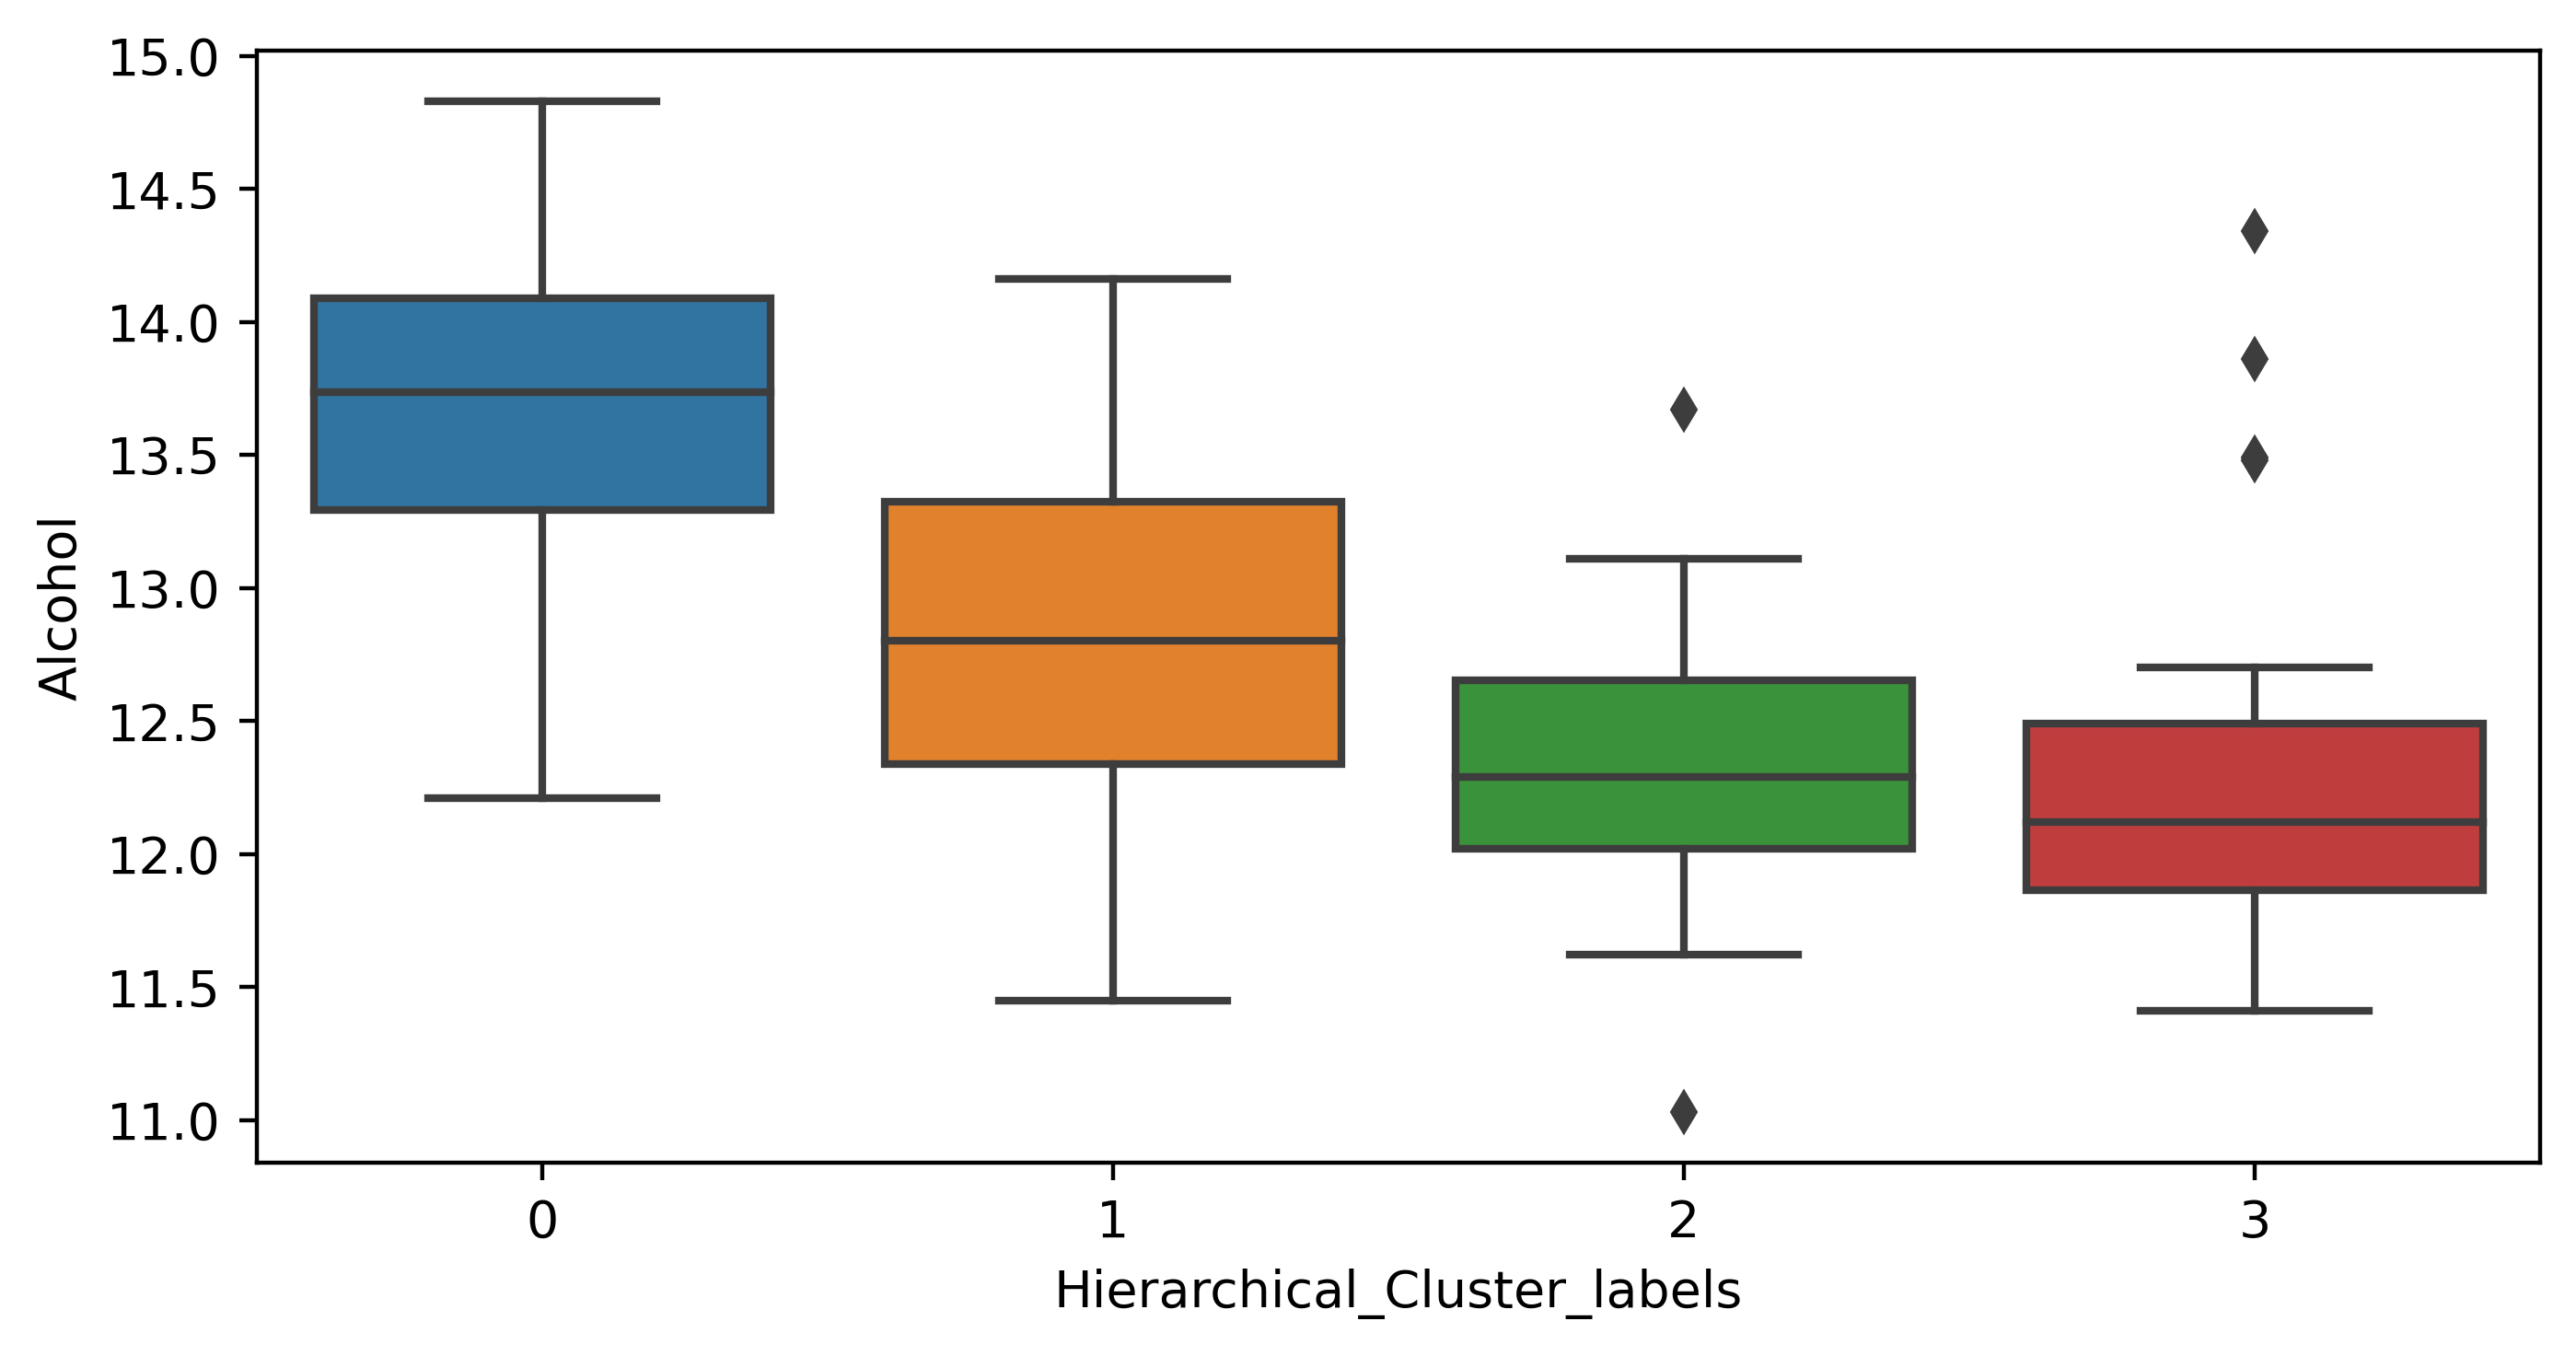

In [150]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Alcohol', data=wine_data_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='Malic'>

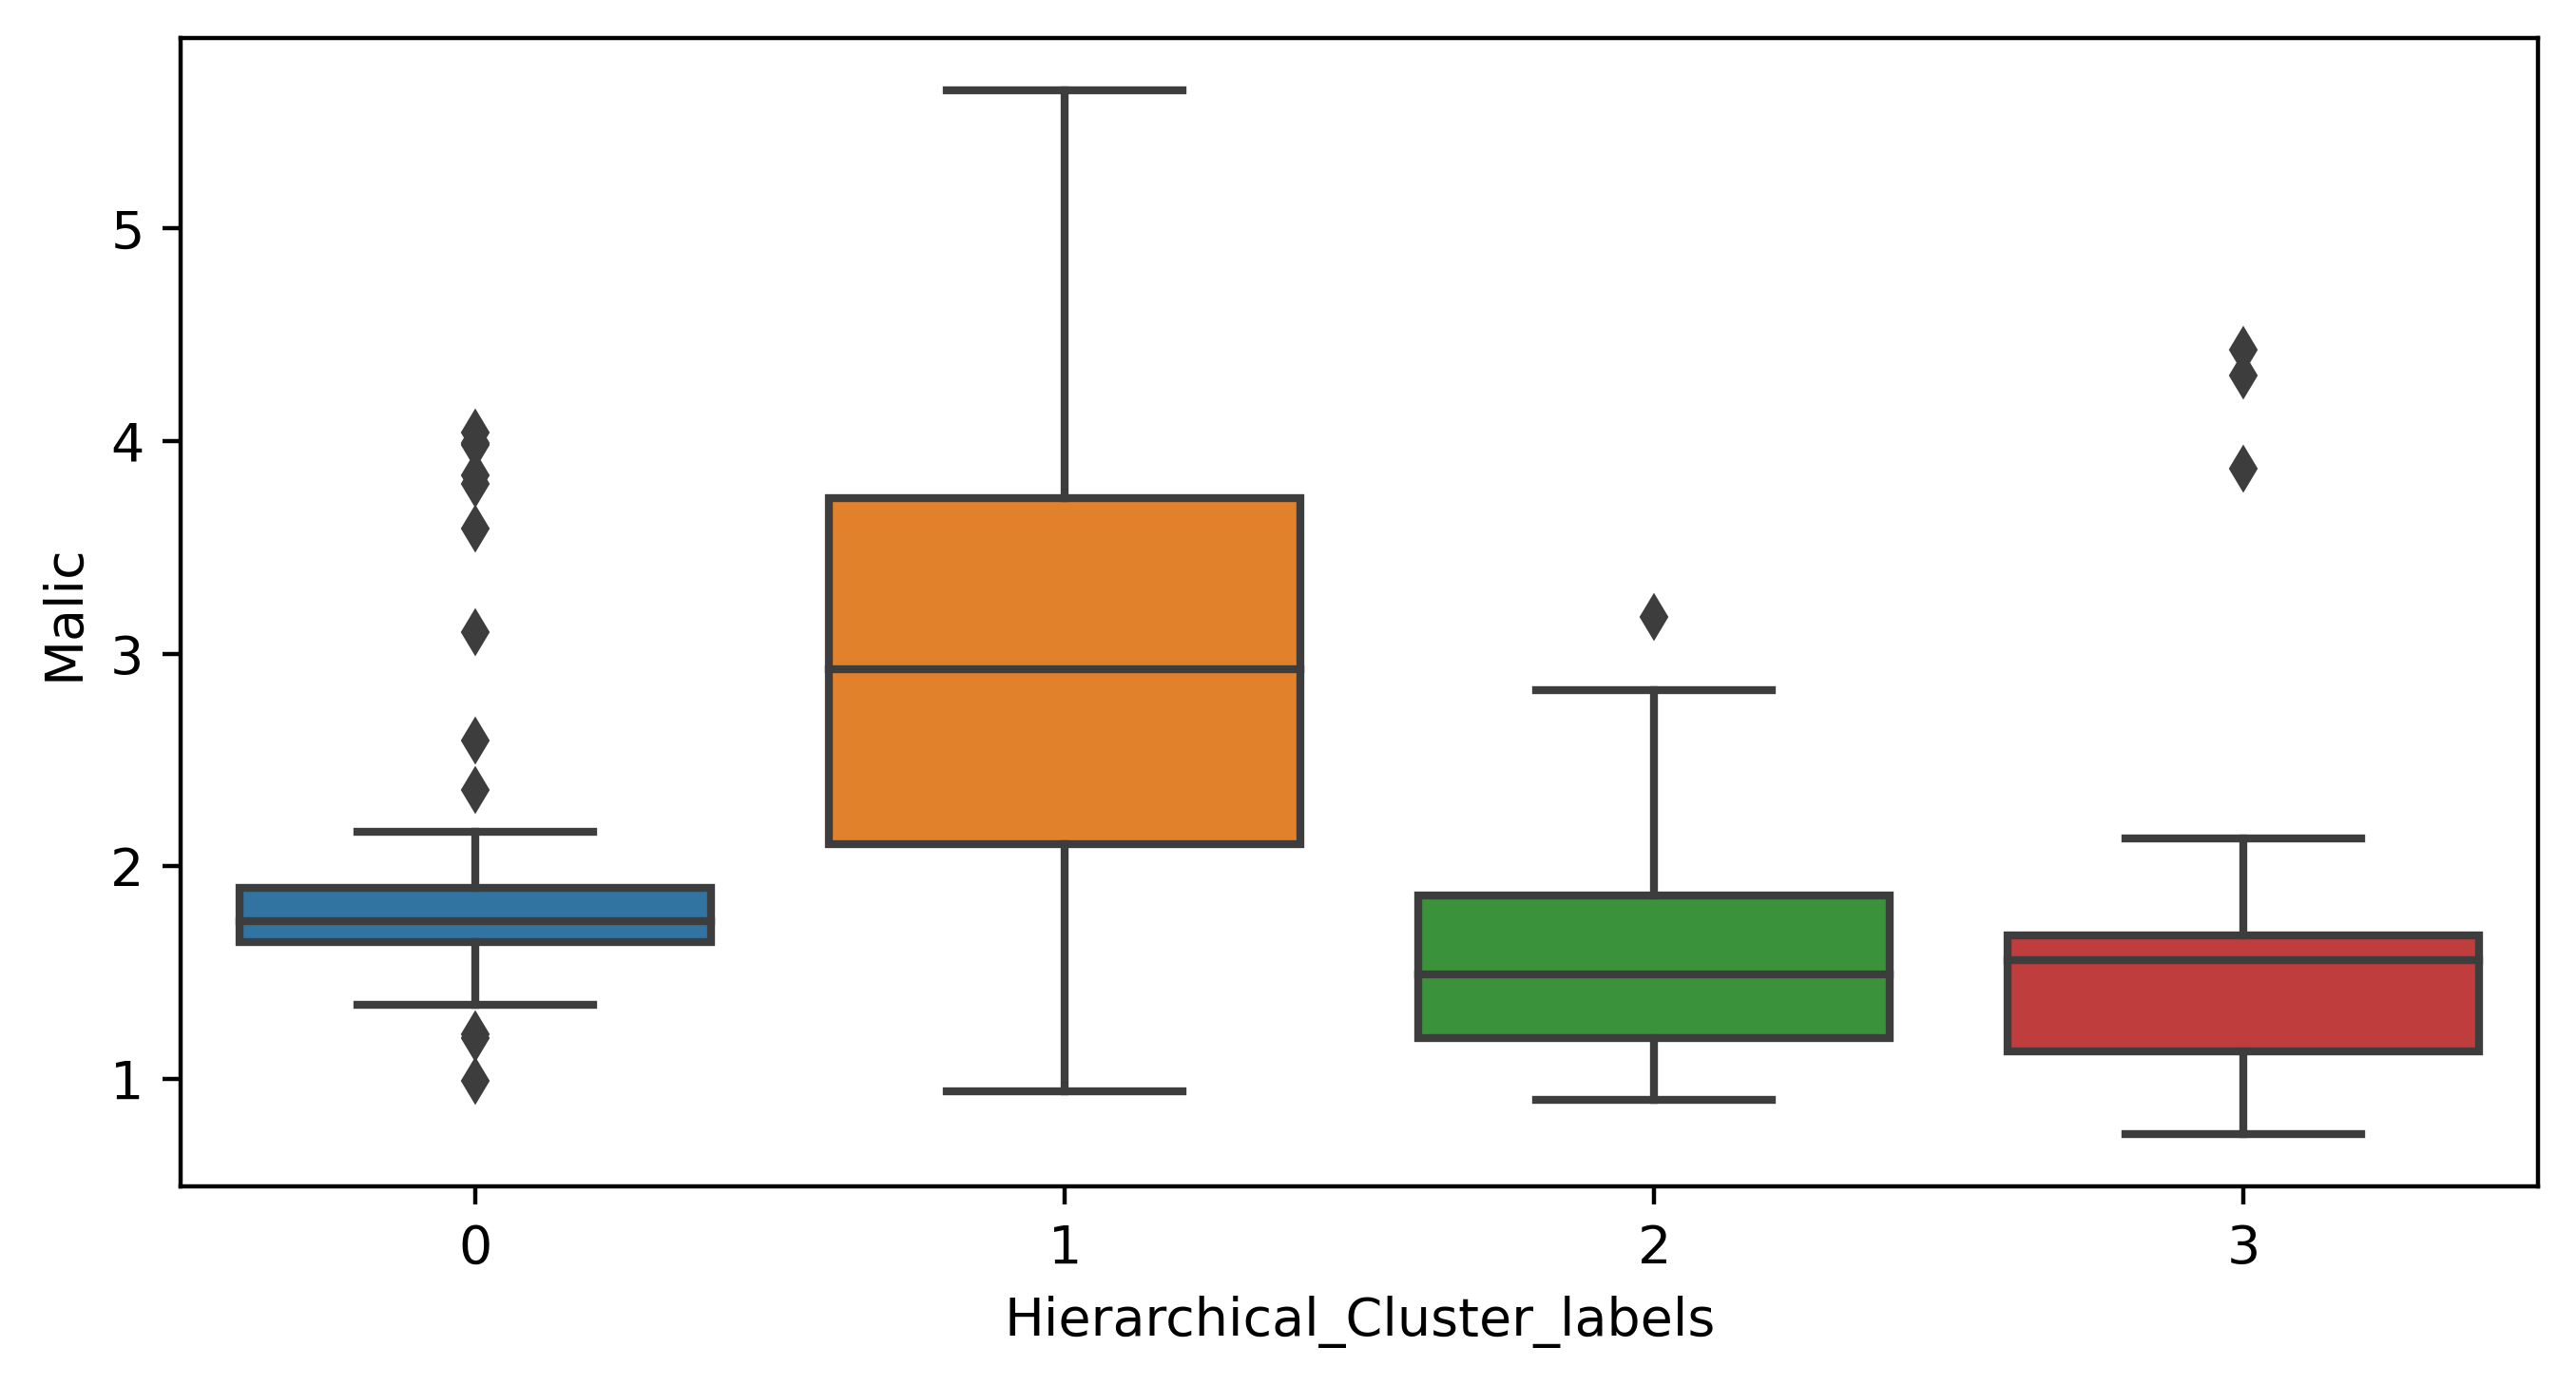

In [151]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Malic', data=wine_data_outliers_removed)

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='Ash'>

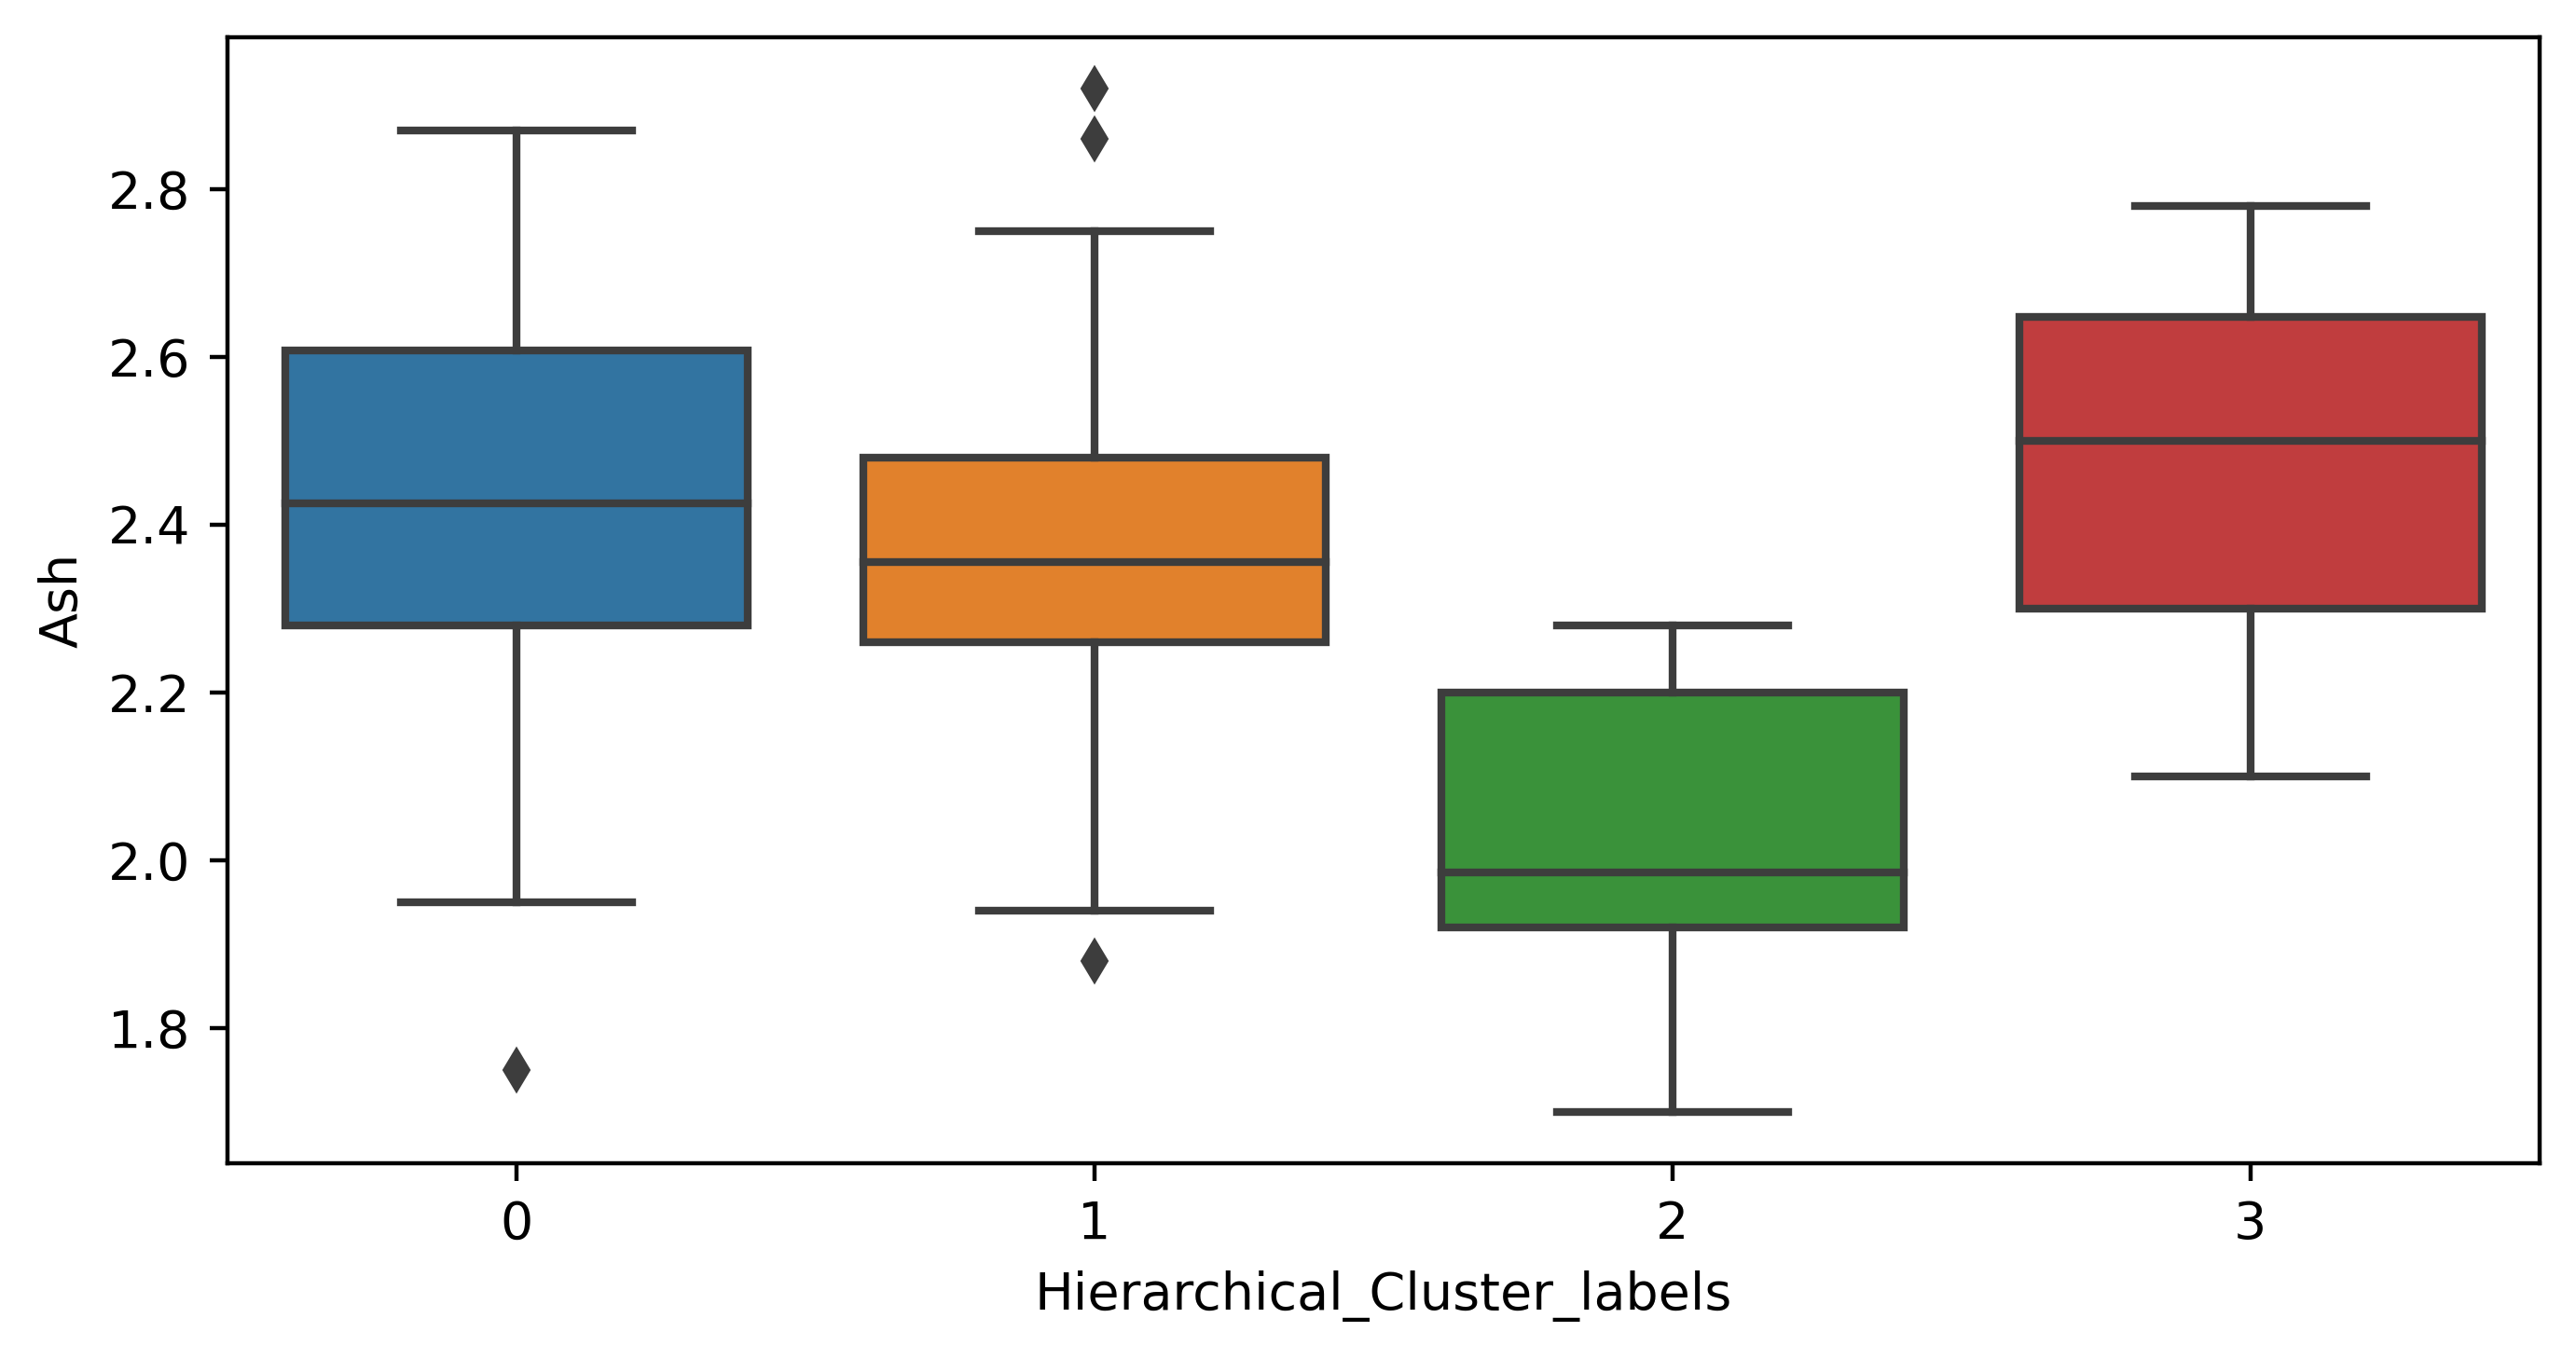

In [152]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Ash', data=wine_data_outliers_removed)

In [153]:
wine_data_outliers_removed.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Hierarchical_Cluster_labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [154]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])


In [155]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4
0,3.378206,1.320455,-0.355037,-0.487425
1,2.683995,-0.451478,-1.813060,0.509881
2,2.807401,1.390539,1.127497,-0.297035
3,3.753033,2.500227,-0.112755,-0.186635
4,1.277766,1.373438,1.994467,-0.135308


In [156]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [157]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4,K_Means_Cluster_ID,Hierarchical_Cluster_Labels
0,3.378206,1.320455,-0.355037,-0.487425,0,0
1,2.683995,-0.451478,-1.813060,0.509881,5,0
2,2.807401,1.390539,1.127497,-0.297035,0,0
3,3.753033,2.500227,-0.112755,-0.186635,0,0
4,1.277766,1.373438,1.994467,-0.135308,3,0


Scatter plot using the first two principal components to observe the cluster distribution# 

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

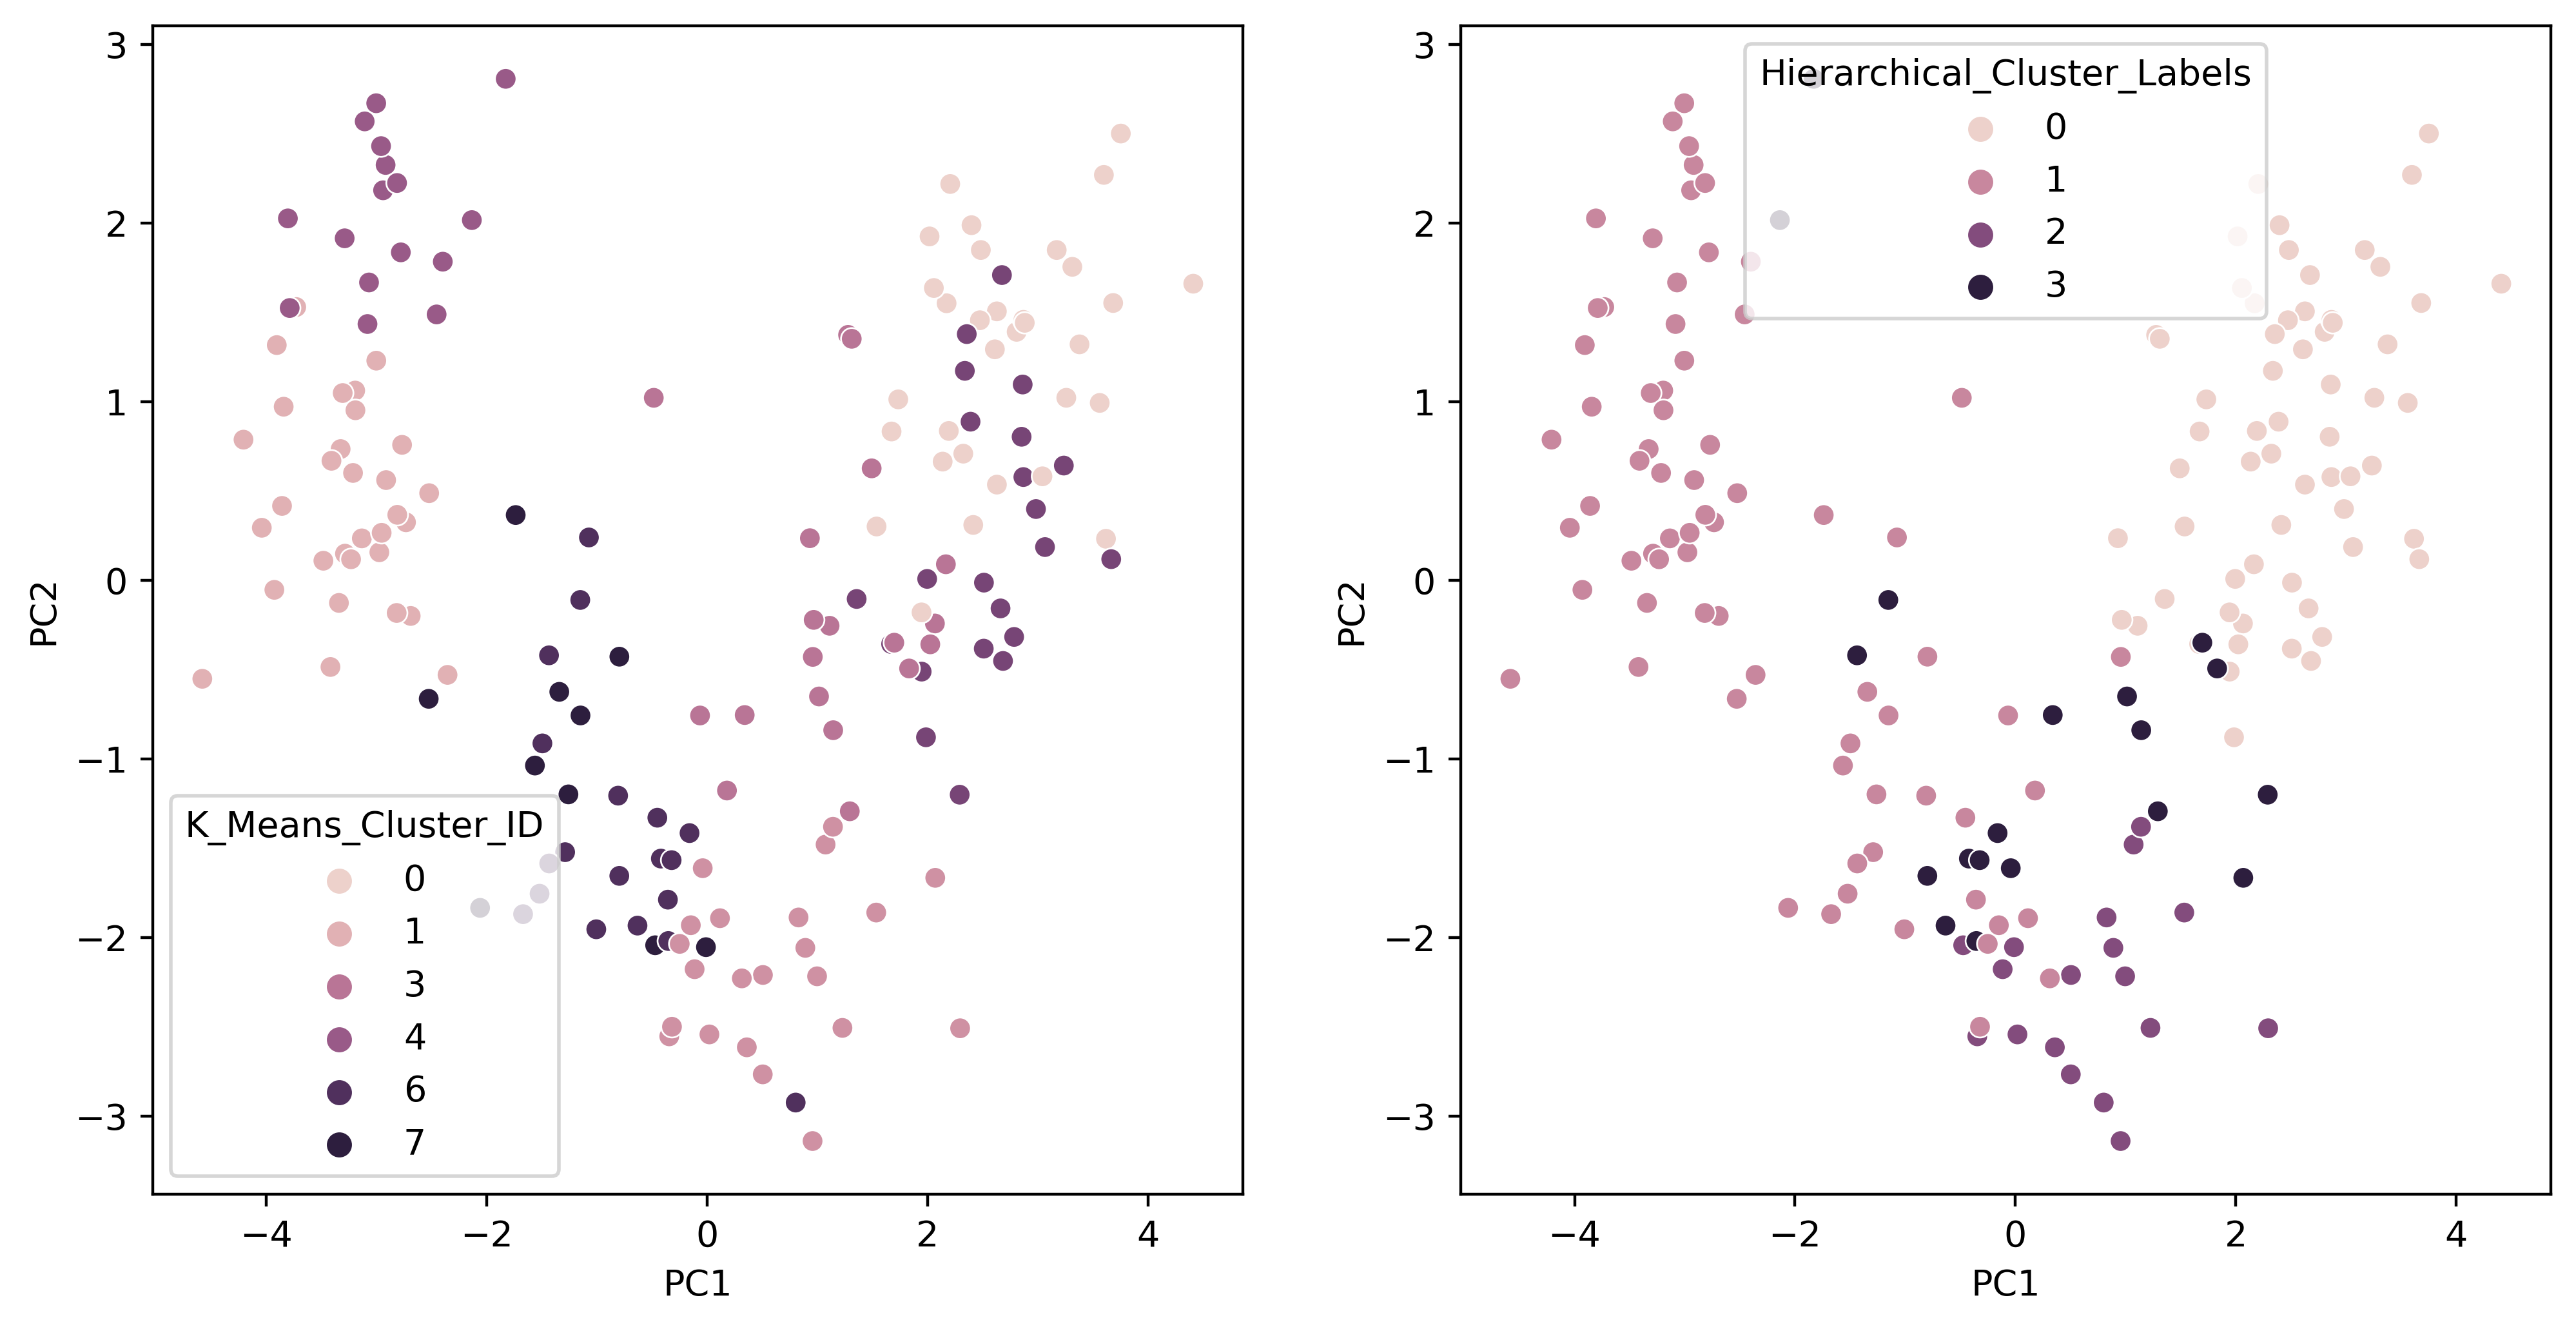

In [173]:
# scatter plot using the first two principal components to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='Hierarchical_Cluster_Labels')
